In [2]:
!pip install --upgrade tensorflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
data_path="/content/drive/MyDrive/merged_folder"

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
model = Sequential()
print("✅ TensorFlow & Keras imported successfully!")


✅ TensorFlow & Keras imported successfully!


In [7]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/merged_folder/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/merged_folder/test',
                                            target_size=(64, 64),
                                            batch_size=16,
                                            class_mode='binary')

Found 477 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [10]:
classifier.fit(training_set,
                         steps_per_epoch=119,
                         epochs=4,
                         validation_data=test_set,
                         validation_steps= 13)
classifier.save('currnencymodel.h5');

Epoch 1/4
119/119 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.8981 - loss: 0.2959 - val_accuracy: 0.9048 - val_loss: 0.1690
Epoch 2/4
119/119 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - accuracy: 0.9009 - loss: 0.2705 - val_accuracy: 0.9048 - val_loss: 0.1410
Epoch 3/4
119/119 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - accuracy: 0.9003 - loss: 0.2256 - val_accuracy: 0.9048 - val_loss: 0.1330
Epoch 4/4
119/119 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.9008 - loss: 0.1989 - val_accuracy: 0.9048 - val_loss: 0.1049


In [11]:
import os
pathr="/content/drive/MyDrive/merged_folder/test/real"
os.listdir(pathr)

['real note_1.jpg',
 'real note_2.jpg',
 'real note_3.jpg',
 'real note_4.jpg',
 'real note_5.jpg',
 'real note_6.jpg',
 'real note_7.jpg',
 'real note_8.jpg',
 'real note_9.jpg',
 'real note_10.jpg',
 'real note_11.jpg',
 'real note_12.jpg',
 'real note_13.jpg',
 'real note_14.jpg',
 'real note_15.jpg',
 'real note_16.jpg',
 'real note_17.jpg',
 'real note_18.jpg',
 'real note_19.jpg']

In [12]:
pathf="/content/drive/MyDrive/merged_folder/test/fake"
os.listdir(pathf)

['fake note_2.jpg', 'fake note_10.jpg']

In [13]:
# Load the trained model
model = load_model('/content/currnencymodel.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Rescale pixel values
    return img


# Example usage: Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = os.path.join(pathf,"fake note_2.jpg")
preprocessed_image = preprocess_image(image_path)

# Make prediction
prediction = model.predict(preprocessed_image)

# Interpret the prediction
print(prediction)
if prediction[0][0] > 0.5:
    print("The image is predicted to be real.")
else:
    print("The image is predicted to be fake.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[0.5255697]]
The image is predicted to be real.


In [14]:
# Load model
model = load_model('/content/currnencymodel.h5')

# Load and preprocess image
img_path = "/content/drive/MyDrive/merged_folder/test/fake/fake note_2.jpg"  # <--- using uploaded image
test_image = image.load_img(img_path, target_size=(64, 64))
test_array = image.img_to_array(test_image)
test_array = test_array / 255.0
test_array = np.expand_dims(test_array, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


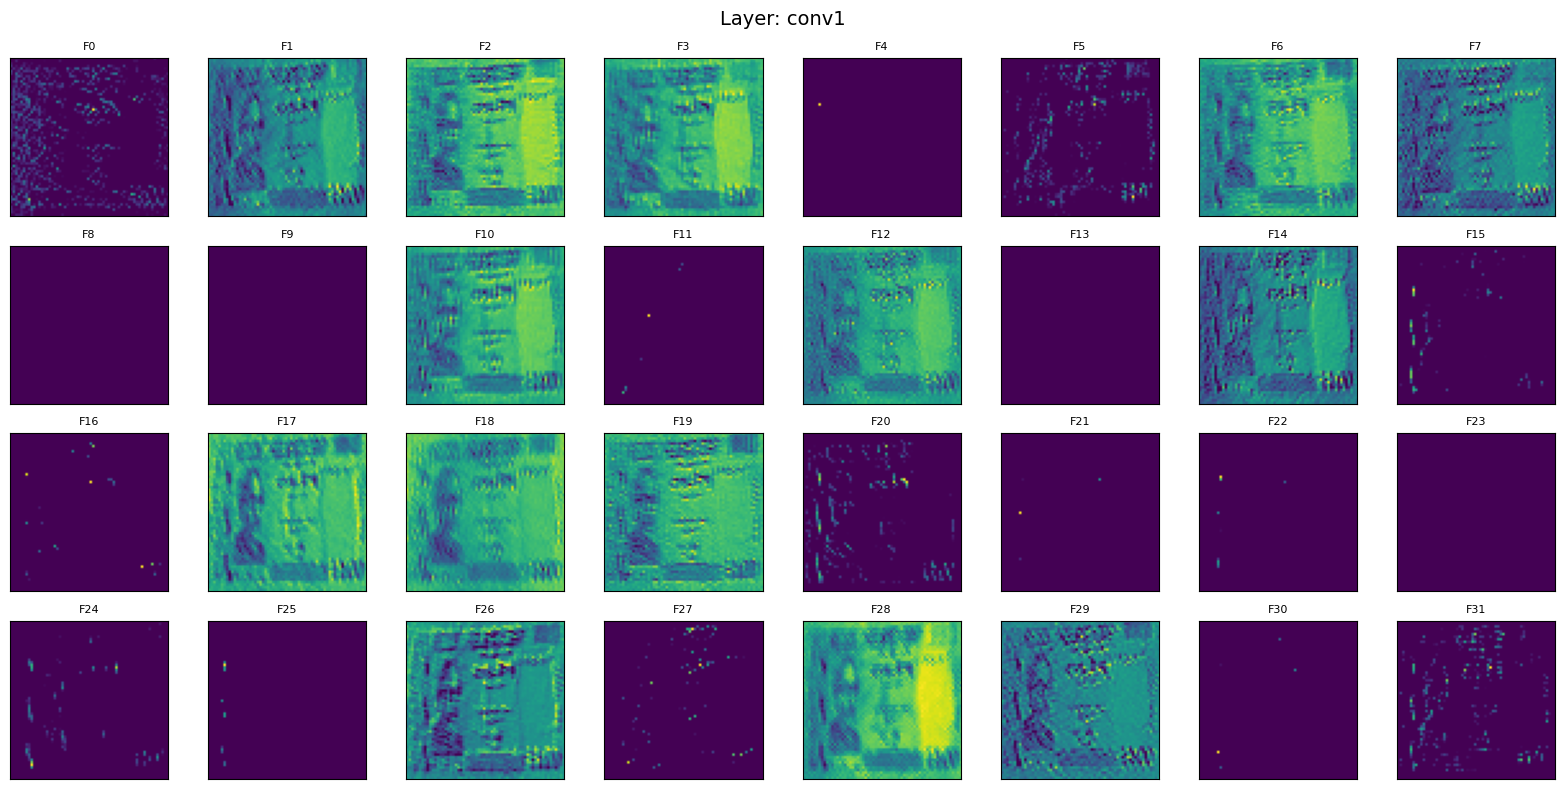

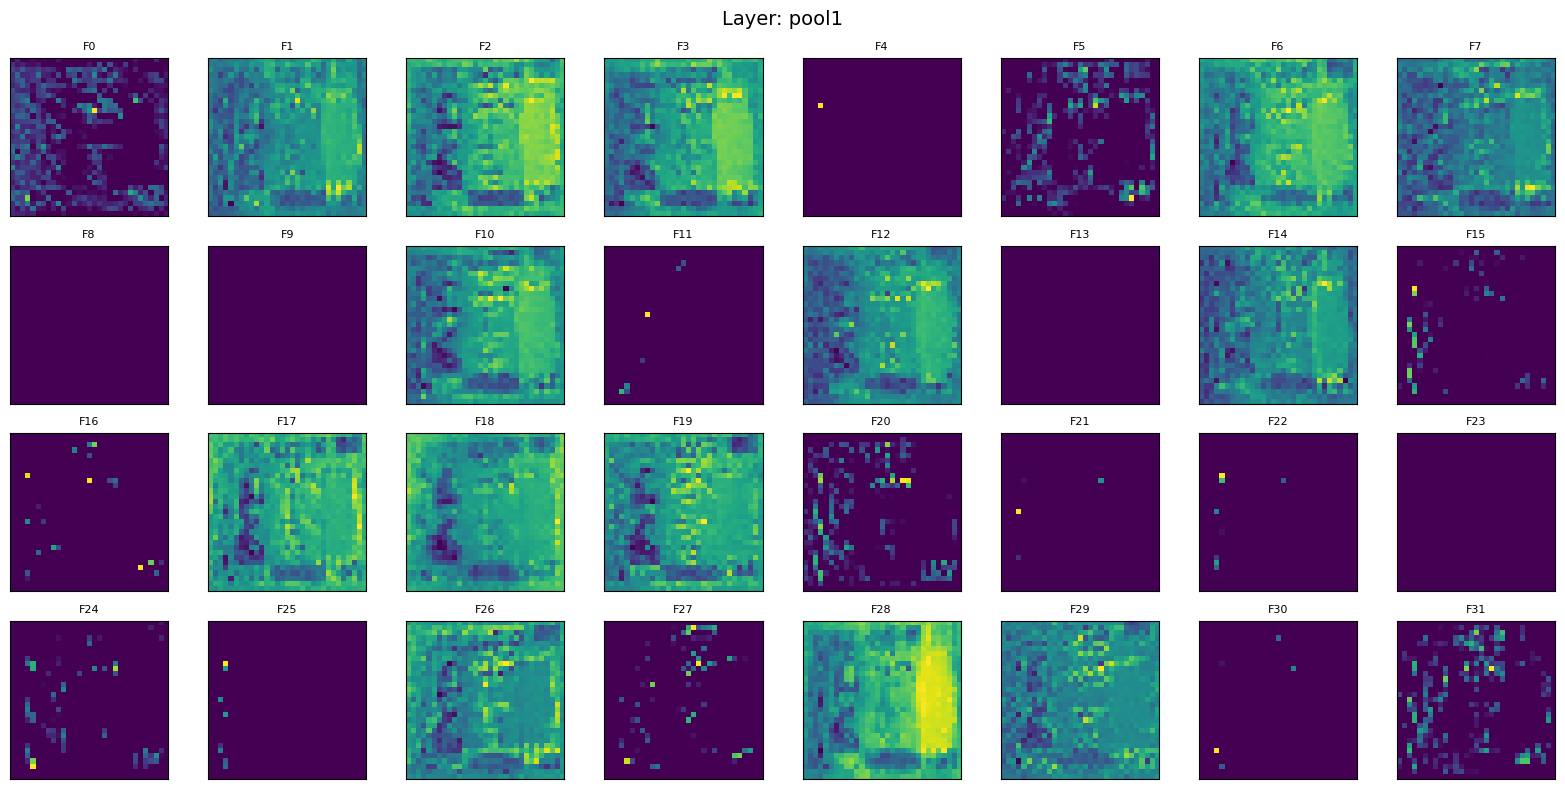

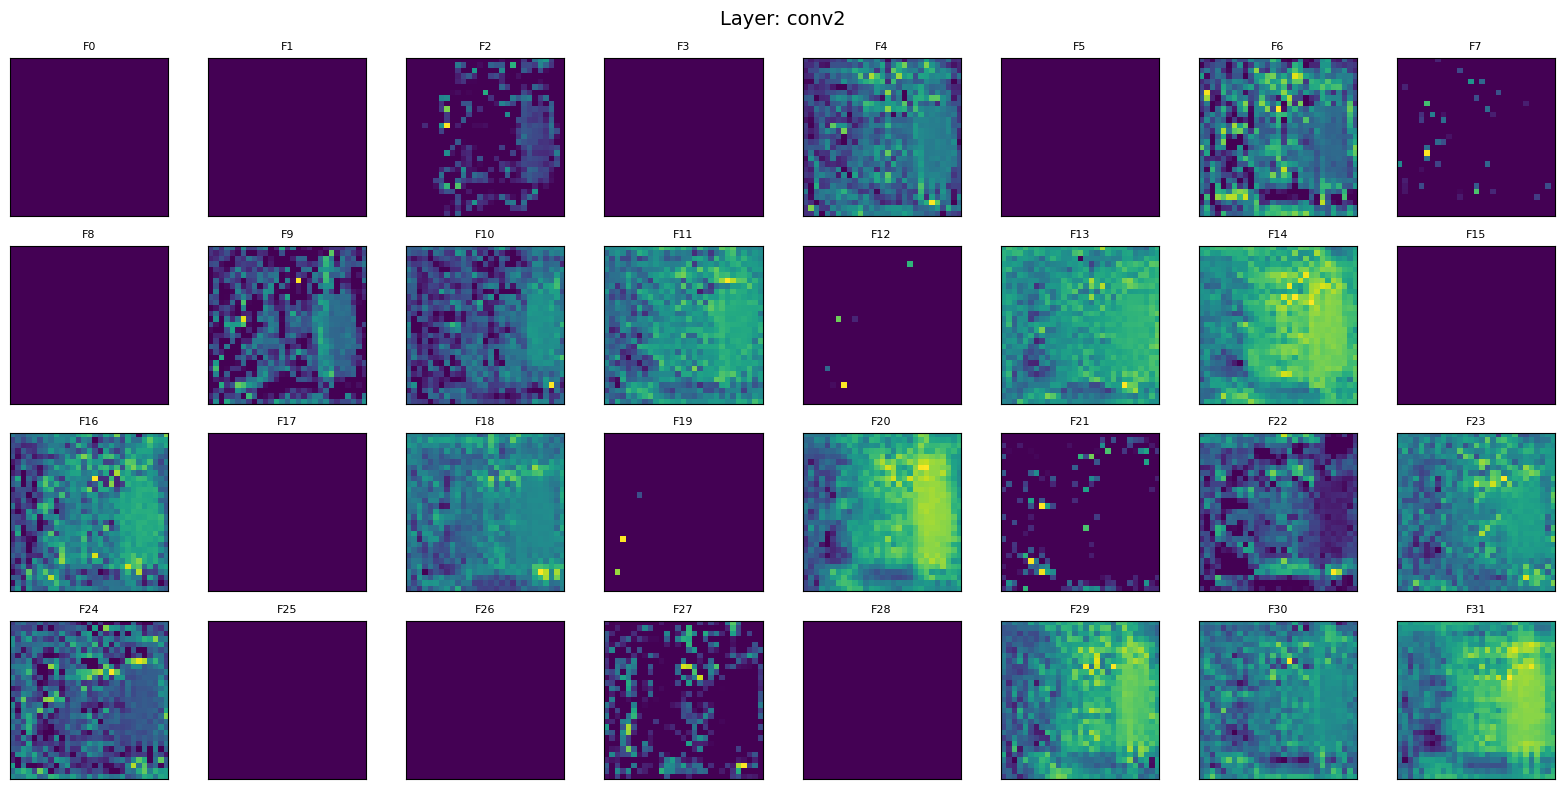

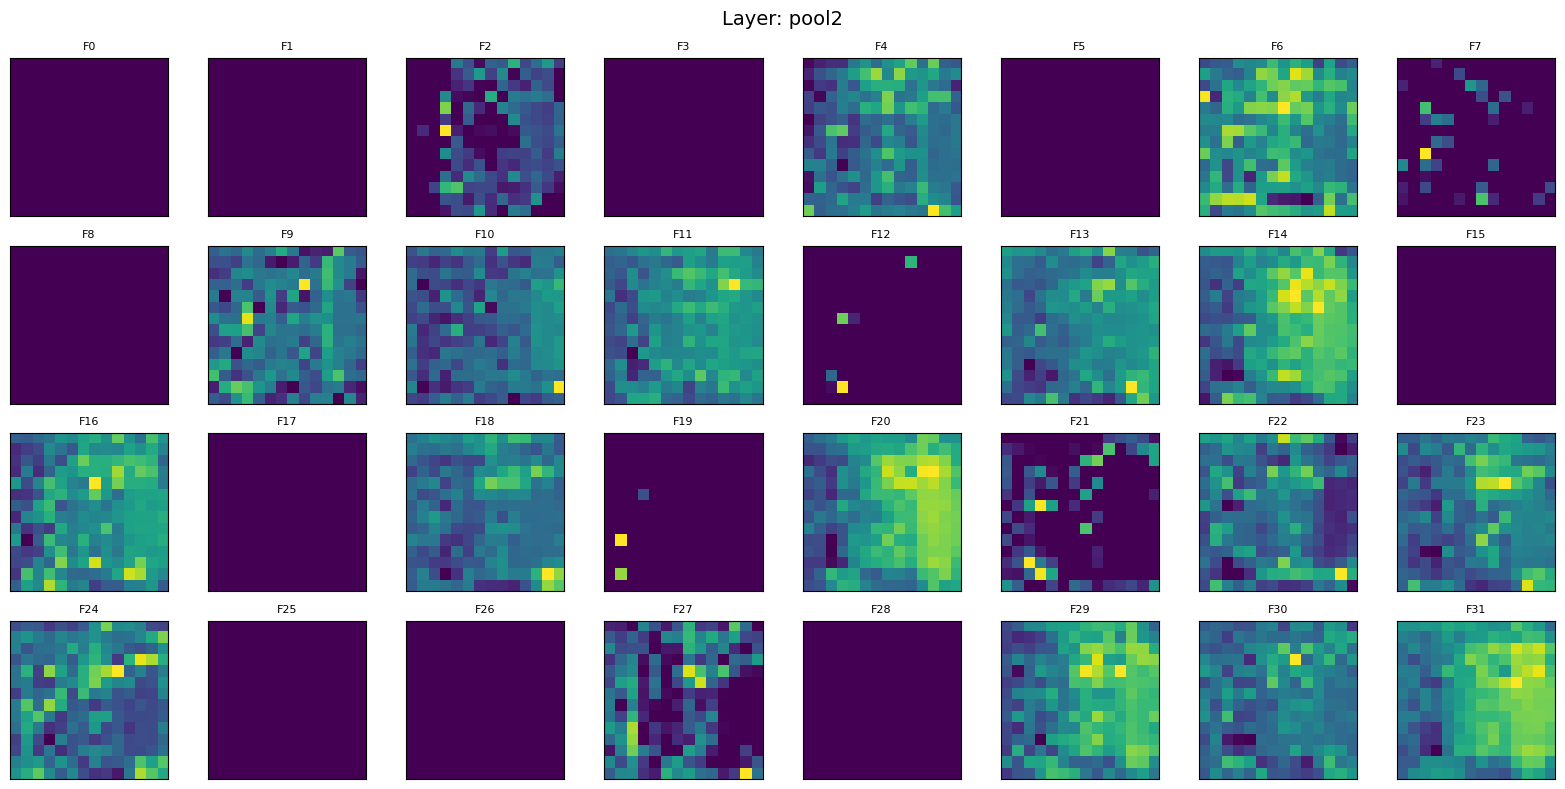

In [18]:
# Step 1: Build the model using the Functional API
inputs = Input(shape=(64, 64, 3), name="input_layer")
x = Conv2D(32, (3, 3), activation='relu', name="conv1")(inputs)
x = MaxPooling2D((2, 2), name="pool1")(x)
x = Conv2D(32, (3, 3), activation='relu', name="conv2")(x)
x = MaxPooling2D((2, 2), name="pool2")(x)
x = Flatten(name="flatten")(x)
x = Dense(128, activation='relu', name="dense1")(x)
outputs = Dense(1, activation='sigmoid', name="output")(x)

model = Model(inputs=inputs, outputs=outputs, name="my_model")

# Step 2: Load and preprocess the image
img_path = "/content/drive/MyDrive/merged_folder/test/real/real note_10.jpg"
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Step 3: Create intermediate model
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Step 4: Predict to get intermediate activations
activations = activation_model.predict(img_array)

# (Optional) Display feature maps
import matplotlib.pyplot as plt

def display_activation(activation, layer_name):
    num_filters = activation.shape[-1]
    cols = 8
    rows = (num_filters + cols - 1) // cols
    plt.figure(figsize=(cols * 2, rows * 2))

    for i in range(num_filters):
        ax = plt.subplot(rows, cols, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.title(f'F{i}', fontsize=8)

    plt.suptitle(f'Layer: {layer_name}', fontsize=14)
    plt.tight_layout()
    plt.show()

layer_names = [layer.name for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
for name, activation in zip(layer_names, activations):
    display_activation(activation, name)